# Chapter 6 Odds and Addends

Using Bayes rule to calculate odds and represent certainty, which can be another way to quantify evidence

### Odds
Probabilities are represented as a value between 0 and 1, however there are other ways to represent chance. Odds in favor is a way to represent the probability as a ratio of odds that it will happen vs odds it will not. 

In [1]:
def odds(p): 
    return p / (1 - p)

For example, if a team has a 75% chance to win a game, another way to describe it is the odds are 3 to 1.

In [2]:
odds(0.75)

3.0

With low odds, its more common to report odds against, the chance of the event not happening.  eg. If something has a 10% chance of happening. Say odds against are 9 to 1, rather than odds for are 1 to 9.

Odds can also be converted back into probabilities.

In [5]:
def prob(o):
    return o / (o+1)

def prob2(yes, no):
    return yes / (yes + no)

In [4]:
prob(3/2)

0.6

In [6]:
prob2(3, 2)

0.6

These can be interconverted. Some calculations are easier with odds/log odds compared to probabilities.

# Bayes Rule
Previously worked with Bayes theorem in probability form, can also represent with odds

Probability form of Bayes
P(H|D) = ( P(H)P(D|H) ) / P(D)

Odds form of bayes
odds(A|D) = odds(A) * P(D|A)/P(D|B)

Where odds(A) is the odds in favor of A.

To simplify, the prior odds can be updated by multiplying by the likelihood ratio

In [7]:
#cookie problem with odds
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds
post_prob = prob(post_odds)
post_prob

0.6

In [8]:
#update after drawing another chocolate cookie
likelihood_ratio = (1/4) / (1/2)
post_odds *= likelihood_ratio
post_odds

0.75

## Oliver's blood
> Two people have left traces of their own blood at the scene of a crime. A suspect, Oliver, is tested and found to have type ‘O’ blood. The blood groups of the two traces are found to be of type ‘O’ (a common type in the local population, having frequency 60%) and of type ‘AB’ (a rare type, with frequency 1%). Do these data give evidence in favor of the proposition that Oliver was one of the people whol left blood at the scene.

Given Bayes' Rule
>odds(A|D) = odds(A) * P(D|A)/P(D|B)

then dividing by odds(A)

>odds(A|D)/odds(A) = P(D|A)/P(D|B)

The term on the right is called the Bayes factor
If the bayes factor > 1 then odds are more likely under A given D, so odds go up.  <1 odds go down, 1 = exactly the same.


For this problem, if Oliver left blood at the scene, he accounts for the O blood, then some random AB person left their blood at the scene (scenario 1).  If oliver didn't leave blood at the scene, then we have two people to account for, some random O person and the random AB person (scenario 2).

Two possible ways
Random O person leaves blood first, then random AB second, or vice versa.

So need to multiply by two to account for both ways.


In [10]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01
likelihood_ratio = like1 / like2
likelihood_ratio

0.8333333333333334

In [11]:
#less likely that Oliver left blood at the scene than two random people but
post_odds = 1 * like1 / like2
prob(post_odds)
#Still a 45% chance.

0.45454545454545453

# Addends
Distributions of sums or other operations

Example: What is the probabily distribution of two dice

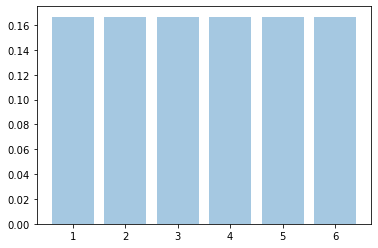

In [12]:
import numpy as np
from empiricaldist import Pmf

#function for rolling 1 die
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

#roll 6 side
die = make_die(6)

#Plot
die.bar(alpha=0.4)

Rolling two die has 11 possibilities (2-12), but the results are not uniformally distributed.  Each combo:

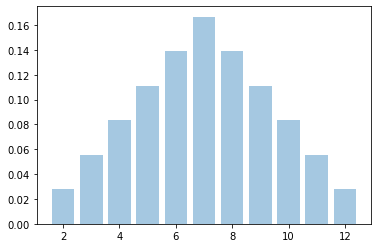

In [16]:
def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum."""
    #initialize
    res = Pmf()
    #loop through two objcts
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
    return res

double_die = add_dist(die, die)
double_die.bar(alpha=0.4)

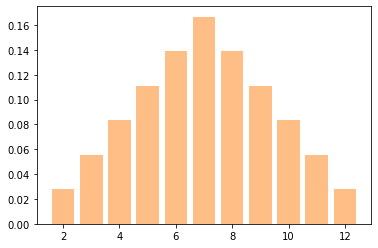

In [18]:
#Pmf has a built in function
twice = Pmf.add_dist(die, die)
twice.bar(color='C1', alpha=0.5)

([<matplotlib.axis.XTick at 0x7fde420ab640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

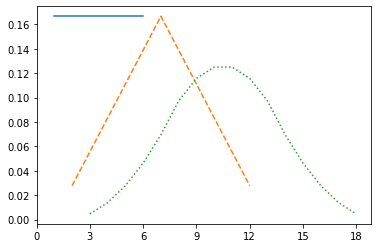

In [19]:
#use a sequence of Pmf objects
import matplotlib.pyplot as plt

def add_dist_seq(seq):
    """Compute Pmf of the sum of values from seq."""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

dice = [die] * 3
thrice = add_dist_seq(dice)


die.plot(label='once')
twice.plot(label='twice', ls='--')
thrice.plot(label='thrice', ls=':')

plt.xticks([0,3,6,9,12,15,18])

Demonstrates the central limit theorem (sum more random events begins converge to bell shape curve

## Gluten Sensitivity example
2015 paper studying gluten sensitivity in non-celiac patients by determing if gluten was present in flour (blinded).

35 subjects 12 correct, 17 wrong, 6 didn't distingish.  Authors concluded 1/3 of people able to detect gluten.  Is this just due to random chance/them guessing?

We can use Baye's theorem to answer the question, but need to set prior assumptions for the model.

- People sensitive to gluten have a 95% chance of correctly identifying gluten
- People insensitive to gluten have a 40% chance of correctly identifying gluten by chance (60% of being wrong or choosing to fail to distingish).

> Forward problem: Compute a distribution assuming we know how many subjects are sensitive.
> Reverse problem: Using the likelihood of the data, compute posterior of sensitive subjects.

### Forward problem

Assume 10 of 35 are sensitive to gluten


In [20]:
n = 35
n_sens = 10
n_insens = n - n_sens

In [23]:
#Each senstivtive subject has a 95% chance of identifying gluten flour, so the number of correct identifications should follow a binomial distribution (each identification does not influence the others, distribution is additive).
from scipy.stats import binom
def make_binomial(n, p):
    """Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

dist_sens = make_binomial(n_sens, 0.95)
dist_insens = make_binomial(n_insens, 0.4)

<AxesSubplot:>

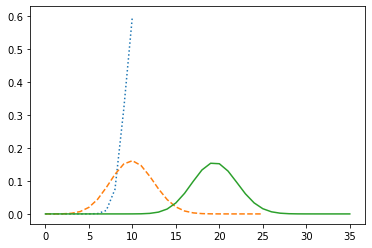

In [25]:
#Add two distributions together to get total result
dist_total = Pmf.add_dist(dist_sens, dist_insens)

#Plot
dist_sens.plot(label='sensitive', ls=':')
dist_insens.plot(label='insensitive', ls='--')
dist_total.plot(label='total')

If 10-25 gluten sensitive-insensitive ratio were true, we'd expect 20 correct interactions in total.  With 10 people insensitive to gluten guessing.  

### Inverse problem
Given the data compute the posterior distribution of the number of sensitive subjects.  

Strategy: Loop through possible values of num sensitive, and compute the distribution of data for each.

In [28]:
import pandas as pd

table = pd.DataFrame()
for n_sens in range(0, n+1):
    n_insens = n - n_sens
    dist_sens = make_binomial(n_sens, 0.95)
    dist_insens = make_binomial(n_insens, 0.4)
    dist_total = Pmf.add_dist(dist_sens, dist_insens)
    table[n_sens] = dist_total

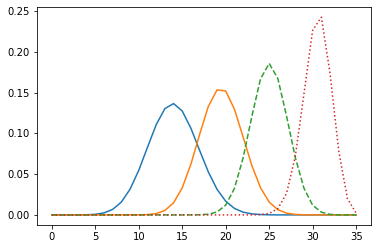

In [32]:
#Plot
#increasing sensitivity increases expected response rate
table[0].plot(label='num_sensitive = 0')
table[10].plot(label='num_sensitive = 10')
table[20].plot(label='num_sensitive = 20', ls='--')
table[30].plot(label='num_sensitive = 30', ls=':')

In [33]:
#select row (row 12, ie row with 12 correct identifications for each hypothetical value of n_sens). Use this likelihood to do an update
likelihood1 = table.loc[12]
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

In [34]:
posterior1 = prior * likelihood1
posterior1.normalize()

0.4754741648615133

In [35]:
#compare with outcome with 20 correct identifications
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887378

<AxesSubplot:>

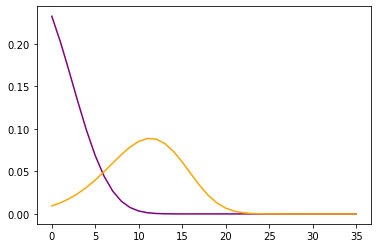

In [38]:
posterior1.plot(label='posterior with 12 correct', color='purple')
posterior2.plot(label='posterior with 20 correct', color='orange')
#x is number of senstive subjects, y = probability

In [45]:
#Get expected value
print(posterior1.max_prob())
print(posterior2.max_prob())

0
11


The 12 respondants are most consistent with none of those samples being sensitive to gluten, which could be explained by random chance.

# Excercises

## Excercise 1
Use Bayes's rule to solve Elvis problem
> Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin?

- In 1935, 2/3 twins were fraternal and 1/3 were identical. (prior)
- Elvis's twin was also male, which is more likely if they are identical (likihood ratio: 2)
- Elvis's twin died at birth, which is more likely if they are identical (likehood ratio: 1.25)


In [46]:
#given odds of being identical in 1935
prior_odds = odds(1/3)

In [49]:
#update by multiplying by likelihoods
post_odds = prior_odds * 2 * 1.25
post_odds

1.2499999999999998

In [48]:
#convert from odds of true to probability 
prob(post_odds)

0.5555555555555555

## Excercise 2 Rain in Seattle 

>You call three friends in Seattle to independently ask if it is raining.  Each friend has a 2/3 chance of telling the truth, while 1/3 chance of lying to mess with you. All three friends say yes, what is the probability it is raining in Seattle.

- As a prior, assume it is raining 10% of the time in Seattle

In [50]:
prior_odds = odds(0.1)
prior_odds

0.11111111111111112

In [53]:
#update prior with info from friends (2:1 three times)
post_odds = prior_odds * 2 ** 3
post_odds

0.888888888888889

In [54]:
#Convert to probability
prob(post_odds)

0.4705882352941177

## Excercise 3. Smoking and lung cancer

According to CDC people who smoke are 25x more likely to develop lung cancer. 14% of adults in US are smokers. If you learn someone has lung cancer, what is the probabilty they are a smoker?

In [56]:
#assign prior
prior_odds = odds(0.14)
prior_odds

0.16279069767441862

In [59]:
#update prior
post_odds = prior_odds * 25
post_odds

4.069767441860465

In [60]:
prob(post_odds)

0.8027522935779816

## Exercise 7: Honest Congressmen

There are 538 members of congress. We audit their investment portfolios and find 312 of them out-perform the market.  Assume a honest member of congress has a 50% chance to outperform the market, and a crooked member who uses insider information has a 90% chance.  How many honest members of congress likely exist?

In [64]:
#generate possibilities
n = 538
table = pd.DataFrame()
for n_honest in range(0, n+1):
    n_crooked = n - n_honest
    
    dist_honest = make_binomial(n_honest, 0.5)
    dist_crooked = make_binomial(n_crooked, 0.9)
    dist_total = Pmf.add_dist(dist_honest, dist_crooked)
    table[n_honest] = dist_total
table.shape
    

/var/folders/0k/22jkfg150n14r67m14wxl5ww0000gn/T/ipykernel_26662/1142260492.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  table[n_honest] = dist_total


(539, 539)

In [65]:
#observed data is 312, so check likelihood
data = 312
likelihood = table.loc[312]
len(likelihood)

539

In [66]:
#set prior
hypos = np.arange(n+1)
prior = Pmf(1, hypos)
len(prior)

539

In [67]:
#solution
posterior = prior * likelihood
posterior.normalize()
posterior.mean()

431.48821145019946

<AxesSubplot:>

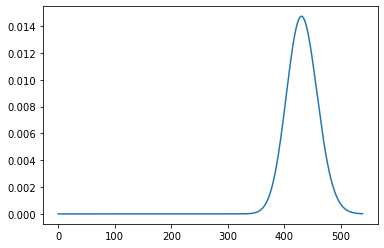

In [68]:
posterior.plot(label='posterior')

In [69]:
#get most likely result
posterior.max_prob()


430

## Exercise: DND

In Dungeons & Dragons, the amount of damage a goblin can withstand is the sum of two six-sided dice. The amount of damage you inflict with a short sword is determined by rolling one six-sided die. A goblin is defeated if the total damage you inflict is greater than or equal to the amount it can withstand.

Suppose you are fighting a goblin and you have already inflicted 3 points of damage. What is your probability of defeating the goblin with your next successful attack?



In [72]:
d6 = make_die(6)

In [78]:
initial_hp = Pmf.add_dist(d6, d6)
initial_hp

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [77]:
damaged_hp = Pmf.sub_dist(initial_hp, 3)
damaged_hp

,probs
-1,0.027778
0,0.055556
1,0.083333
2,0.111111
3,0.138889
4,0.166667
5,0.138889
6,0.111111
7,0.083333
8,0.055556


In [79]:
damaged_hp[[-1, 0]] = 0
damaged_hp.normalize()
damaged_hp

,probs
-1,0.000000
0,0.000000
1,0.090909
2,0.121212
3,0.151515
4,0.181818
5,0.151515
6,0.121212
7,0.090909
8,0.060606


In [80]:
damage = d6

In [82]:
points_left = Pmf.sub_dist(damaged_hp, damage)
points_left.prob_le(0)

0.4545454545454545